Disclaimer: The product categorizations were accomplised via teamwork of 4 people including me working on mapping the top10 types of products. However, the rest of the analyzation of the price ranges were done completely by myself.

In [ ]:
import pandas as pd

In [ ]:
# orders_qu.csv
url = "https://drive.google.com/file/d/1wxLuwU2bEdQjb2QkSNVY_sufkqb0zdlf/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders = pd.read_csv(path)

# orderlines_qu.csv
url = "https://drive.google.com/file/d/1QCjywJchXxPch7IKOXhdsqHhO2AJLZwH/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines = pd.read_csv(path)

# products_cl.csv
url = "https://drive.google.com/file/d/19-iDieCJdrnFv1W10OEXXkusJ4txCtb7/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products = pd.read_csv(path)

# brands.csv
url = "https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)

In [ ]:
orders_qu = orders.copy()
orderlines_qu = orderlines.copy()
products_cl = products.copy()
brands_df = brands.copy()

In [ ]:
orders_qu = orders_qu.drop('Unnamed: 0',axis=1)
orderlines_qu = orderlines_qu.drop(['Unnamed: 0','product_id','Corrupted'],axis=1)
products_cl = products_cl.drop(['Unnamed: 0'],axis=1)

In [ ]:
merged_orders = orderlines_qu.merge(products_cl,
                                    on = 'sku',
                                    how = 'left')

#the original set price minus the sold price meaning the diff_price is the discount
merged_orders['diff_price'] = merged_orders['price'] - merged_orders['unit_price']

#calculate the % of discount
merged_orders['%_discount'] = merged_orders['diff_price']/merged_orders['price']*100
merged_orders['date'] = pd.to_datetime(merged_orders['date'])

In [ ]:
orderlines_qu['unit_price_total'] = orderlines_qu['unit_price'] * orderlines_qu['product_quantity']

price_totals = (
  orderlines_qu
  .groupby('id_order')
  .agg({'unit_price_total':'sum'})
).reset_index() # makes sure we have a data frame and the id_order is accessible

orders_totals = orders_qu.merge(price_totals,
                                left_on = 'order_id',
                                right_on='id_order',
                                how='left')

orders_totals['difference'] = orders_totals['total_paid'] - orders_totals['unit_price_total']

#Product category

In [ ]:
# top10_types.csv  choncha
url = "https://drive.google.com/file/d/17uoM_Y7CxIyzNoGsNKRdNOGOFBmHJSqe/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
top10 = pd.read_csv(path)

top10_df = top10.drop('Unnamed: 0', axis=1).copy()

# change type of chonchas df to strings (as its like this everywhere else)
i=0
for item in top10_df['type']:
  top10_df.loc[i,'type']=None
  top10_df.loc[i,'type']=str(item)
  i+=1

top10_df.loc[0,'category'] = 'Photographic Gadgets'
top10_df.loc[4,'category'] = 'Adapters/Computer Technicals'
top10_df.loc[5,'category'] = 'Hard Drives (Mac)'

top10_df = top10_df.drop('type_rank', axis=1)

<ipython-input-7-4af6cb341848>:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '11905404' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  top10_df.loc[i,'type']=str(item)


In [ ]:
#Top 20
# putting julias oberservation into a dictionary
dicts = [
    {'type':'1405',
    'category':'Graphic Tablets'},
    {'type':'12175397',
    'category':'NAS Data Storage Devices'},
    {'type':'1325',
    'category':'Cables'},
    {'type':'13835403',
    'category':'MacBook Cases and Covers'},
    {'type':'13855401',
    'category':'Protective Keyboads/Accessories'},
    {'type':'12755395',
    'category':'Mac SSD Installation Kits'},
    {'type':'13555403',
    'category':'IPhone Screen Protector'},
    {'type':'42945397',
    'category':'External Storage Devices'},
    {'type':'13615399',
    'category':'Chargers/Charging stations'},
    {'type':'1231',
    'category':'AppleCare Protection Plan'}]
top20_df = pd.DataFrame(dicts, columns=['type','category'])

In [ ]:
# top30_types.csv Dana
url = "https://drive.google.com/file/d/1DYnIScmgYSbN9bkLFfjPP7SymxKMsepu/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
top30 = pd.read_csv(path)

top30_df = top30.drop('Unnamed: 0', axis=1).copy()

In [ ]:
fine_categories = pd.concat([top10_df,top20_df,top30_df],axis=0)
fine_categories.rename(columns={'category': 'type_desc'}, inplace=True)

In [ ]:
# put all types into overcategories
dicts = [
    {'type':['11865403','1230','13555403', '13615399', '14305406', '12635403', '1229','1231'],
    'category':'Phone/Tablets accessories'},

    {'type':['11935397', '1364', '12215397', '12655397', '12175397', '42945397', '1433'],
    'category':'Storages'},

    {'type':['11905404'],
    'category':'Photography gadgets'},

    {'type':['5384', '5398'],
    'category':'Audio equipments'},

    {'type':['12585395', '1325', '12755395', '10142', '12995397'],
    'category':'Computer technical equipments'},

    {'type':['1296'],
    'category':'Monitor Screens'},

    {'type':['1405'],
    'category':'Tablets'},

    {'type':['13835403', '13855401', '13005399'],
    'category':'Computer/Laptop Accessories'},


    {'type':['51601716'],
     'category': 'Smartphones'},

    {'type':['1,02E+12'],
    'category':'Laptops'}

    ]
allcategories = pd.DataFrame(dicts, columns=['type','category'])

In [ ]:
products_cl['type_category'] = ""

# get our categories from all categories into merged orders
for i in range(len(allcategories)):   # loops through allcategories
  products_cl.loc[products_cl['type'].isin(allcategories['type'][i]),'type_category'] = allcategories['category'][i]

In [ ]:
products_cl

,sku,name,desc,price,in_stock,type,type_category
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.9900,1,8696,
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.0000,0,13855401,Computer/Laptop Accessories
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.0000,0,1387,
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.0000,0,1230,Phone/Tablets accessories
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.9900,1,1364,Storages
...,...,...,...,...,...,...,...
10404,DJI0026,DJI Mavic Air Drone cuadricóptero Arctic White,Drone cuadricóptero laptop with integrated cam...,8490.0013,0,11905404,Photography gadgets
10405,DJI0025,DJI Mavic Air Drone Black Onyx cuadricóptero,Drone cuadricóptero laptop with integrated cam...,8490.0013,0,11905404,Photography gadgets
10406,LIN0013,Linksys Wi-Fi Velop system AC2200 1 unit,Wi-Fi high-density intelligent Mesh technology,1999.9001,0,1334,
10407,LIN0014,Linksys Wi-Fi Velop system AC4400 2 units,Wi-Fi high-density intelligent Mesh technology,299.9905,1,1334,


#Discount & Sale relationships

**Price Range**

In [ ]:
merged_cat = merged_orders.merge(products_cl[['sku', 'type_category']],
                                 on = 'sku',
                                 how = 'left')

In [ ]:
merged_cat

,id,id_order,product_quantity,sku,unit_price,date,name,desc,price,in_stock,type,diff_price,%_discount,type_category
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,13.50,22.134776,Computer technical equipments
1,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,0,5720,3.96,17.254902,
2,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,1,13005399,16.81,18.887640,Computer/Laptop Accessories
3,1119126,299549,1,PAC0929,256.60,2017-01-01 02:07:42,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",IMac desktop computer 27 inch Retina 5K RAM 32...,3209.00,0,1282,2952.40,92.003739,
4,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,0,1298,16.09,20.898818,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61297,1649474,525664,1,TUC0207,16.52,2018-03-14 11:45:05,Tucano Elements Second Skin Macbook Sleeve 12 ...,velvety inner protective case for MacBook 12 i...,24.99,0,13835403,8.47,33.893557,Computer/Laptop Accessories
61298,1649512,527070,2,APP0698,9.99,2018-03-14 11:49:01,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,15.01,60.040000,Phone/Tablets accessories
61299,1649522,527074,2,APP0698,9.99,2018-03-14 11:49:36,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,15.01,60.040000,Phone/Tablets accessories
61300,1649565,527096,3,APP0698,9.99,2018-03-14 11:54:35,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,15.01,60.040000,Phone/Tablets accessories


In [ ]:
products_cl['category'] = products_cl['type_category']

In [ ]:
# put shusmas categories in overall categories (only the ones that make sense for overall)
# Set all names of mac and price > 500 as computer

products_cl.loc[(products_cl["name"].str.contains("mac", case=False)) & (products_cl["price"] > 1000), "category"] = "Laptops"
# Chargers
#products_cl.loc[(products_cl["name"].str.contains("charge", case=False))|(products_cl["name"].str.contains("cable", case=False))|(products_cl["name"].str.contains("lightning", case=False))|(products_cl["name"].str.contains("wireless charging", case=False))|(~products_cl["name"].str.contains("fitbit", case=False)),"category"]="PhoneTablets accesspories"
# Screen Protector
products_cl.loc[(products_cl["name"].str.contains("glass", case=False))|(products_cl["name"].str.contains("screen", case=False))|(products_cl["name"].str.contains("protector", case=False)),"category"]="Phone/Tablets accessories"
#Headsets
products_cl.loc[(products_cl["name"].str.contains("headphon", case=False)),"category"]="Audio equipments"
#Memory_Ram
products_cl.loc[(products_cl["name"].str.contains("ddr", case=False)),"category"]="Storages"
#Speaker
products_cl.loc[(products_cl["name"].str.contains("speaker", case=False)),"category"]="Audio equipments"
#Battery
#products_cl.loc[(products_cl["name"].str.contains("battery", case=False)),"category"]+=", Battery"
#Adapter
#products_cl.loc[(products_cl["name"].str.contains("adapter", case=False)),"category"]="Phone/Tablets accessories"
#Monitor
products_cl.loc[(products_cl["name"].str.contains("monitor", case=False)),"category"]="Monitor Screens"
#Ipad
products_cl.loc[(products_cl["name"].str.contains("ipad", case=False)) & (products_cl["price"] > 300), "category"] = "Tablets"
#Iphones
products_cl.loc[(products_cl["name"].str.contains("iphone", case=False)) & (products_cl["price"] > 250), "category"] = "Smartphones"
#NAS storage
products_cl.loc[(products_cl["name"].str.contains("nas", case=False)),"category"]="Storages"
# Phone cases per type
#products_cl.loc[(products_cl["type"] == "11865403") | (products_cl["name"].str.contains("case", case=False)), "category"] = "Phone/Tablets accessories"
#HDD storage
products_cl.loc[((products_cl["name"].str.contains("hard disk", case=False)) | (products_cl["name"].str.contains("hard drive", case=False)) | (products_cl["name"].str.contains("ssd", case=False))|(products_cl["name"].str.contains("memory card", case=False))|(products_cl["name"].str.contains("flash drive", case=False))|(products_cl["name"].str.contains("tb", case=False)))& (products_cl["price"] < 500), "category"] = "Storages"
#Keyboard
#products_cl.loc[(products_cl["name"].str.contains("keyboard", case=False)),"category"]="Computer/Laptop Accessories"
#Drone
products_cl.loc[(products_cl["name"].str.contains("drone", case=False)) & (products_cl["price"] > 60), "category"] = "Photography gadgets"
#Router
products_cl.loc[(products_cl["name"].str.contains("router", case=False)),"category"]="Computer/Laptop Accessories"
#AppleCare
#products_cl.loc[(products_cl["name"].str.contains("applecare", case=False)),"category"]+="applecare"
#Covers
#products_cl.loc[(products_cl["desc"].str.contains("cover",case = False)),"category"]+="cover"


In [ ]:
# Set all names of mac and price > 500 as computer
products_cl.loc[(products_cl["name"].str.contains("mac", case=False)) & (products_cl["name"].str.contains("apple", case=False)) & (products_cl["price"] > 1000), "category"] += ", apple_computer"
# Chargers

products_cl.loc[((products_cl["name"].str.contains("charging", case=False))|products_cl["name"].str.contains("charg", case=False))|(products_cl["name"].str.contains("cable", case=False))|(products_cl["name"].str.contains("lightning", case=False))|(products_cl["name"].str.contains("wireless charging", case=False)) & ~(products_cl["name"].str.contains("fitbit", case=False)),"category"]+=", charger"

# Screen Protector
products_cl.loc[(products_cl["name"].str.contains("glass", case=False))|(products_cl["name"].str.contains("screen", case=False))|(products_cl["name"].str.contains("protector", case=False)),"category"]+=", Screen protector"
#Headsets
products_cl.loc[(products_cl["name"].str.contains("head", case=False)),"category"]+=", earphones"
#Memory_Ram
#products_cl.loc[(products_cl["name"].str.contains("ddr", case=False)),"category"]+=", memory_ram"
#Speaker
products_cl.loc[(products_cl["name"].str.contains("speaker", case=False)),"category"]+=", speaker"
#Battery
products_cl.loc[(products_cl["name"].str.contains("battery", case=False)),"category"]+=", Battery"
#Adapter
products_cl.loc[(products_cl["name"].str.contains("adapter", case=False)),"category"]+=", adapter"
#Monitor
#products_cl.loc[(products_cl["name"].str.contains("monitor", case=False)),"category"]+=", monitor"
#Ipad
products_cl.loc[(products_cl["name"].str.contains("ipad", case=False)) & (products_cl["price"] > 300), "category"] += ", ipad"
#Iphones
products_cl.loc[(products_cl["name"].str.contains("iphone", case=False)) & (products_cl["price"] > 250), "category"] += ", iphone"
#NAS storage
#products_cl.loc[(products_cl["name"].str.contains("nas", case=False)),"category"]+=", nas_storage"
# Phone cases per type
products_cl.loc[(products_cl["type"] == "11865403") | (products_cl["name"].str.contains("case", case=False)), "category"] += ", cases"
#HDD storage
#products_cl.loc[((products_cl["name"].str.contains("hard disk", case=False)) | (products_cl["name"].str.contains("hard drive", case=False)) | (products_cl["name"].str.contains("ssd", case=False))|(products_cl["name"].str.contains("memory card", case=False))|(products_cl["name"].str.contains("flash drive", case=False))|(products_cl["name"].str.contains("tb", case=False)))& (products_cl["price"] < 500), "category"] += ", hdd_storage"
#Keyboard
products_cl.loc[(products_cl["name"].str.contains("keyboard", case=False)),"category"]+=", keyboard"
#Drone
products_cl.loc[(products_cl["name"].str.contains("drone", case=False)) & (products_cl["price"] > 60), "category"] += ", drone"
#Router
products_cl.loc[(products_cl["name"].str.contains("router", case=False)),"category"]+=", router"
#AppleCare
#products_cl.loc[(products_cl["name"].str.contains("applecare", case=False)),"category"]+=", applecare"
#Covers
#products_cl.loc[(products_cl["desc"].str.contains("cover",case = False)),"category"]+=", cover"

In [ ]:
merged_cat = merged_cat.merge(products_cl[['sku', 'category']],
                              on = 'sku',
                              how = 'left')

In [ ]:
merged_cat['brand_code'] = merged_cat['sku'].str[:3]
merged_cat = merged_cat.merge(brands_df,
                              left_on = 'brand_code',
                              right_on = 'short',
                              how = 'left')

merged_cat = merged_cat.drop('short', axis=1)

In [ ]:
def price_range(df, price, range):
  df[range] = ""
  df.loc[df[price] < 50, [range]] = 'under 50'
  df.loc[(50 <= df[price]) & (df[price] < 100), [range]] = 'under 100'
  df.loc[(100 <= df[price]) & (df[price] < 200), [range]] = 'under 200'
  df.loc[(200 <= df[price]) & (df[price] < 500), [range]] = 'under 500'
  df.loc[(500 <= df[price]) & (df[price] < 1000), [range]] = 'under 1k'
  df.loc[(1000 <= df[price]) & (df[price] < 2000), [range]] = 'under 2k'
  df.loc[df[price] >= 2000, [range]] = 'over 2k'

In [ ]:
price_range(merged_cat, 'price', 'price_range')

In [ ]:
price_range(merged_cat, 'unit_price', 'unit_price_range')

In [ ]:
merged_cat

,id,id_order,product_quantity,sku,unit_price,date,name,desc,price,in_stock,type,diff_price,%_discount,type_category,category,brand_code,long,price_range,unit_price_range
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,13.50,22.134776,Computer technical equipments,Computer technical equipments,OWC,OWC,under 100,under 50
1,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,0,5720,3.96,17.254902,,,IOT,iOttie,under 50,under 50
2,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,1,13005399,16.81,18.887640,Computer/Laptop Accessories,"Phone/Tablets accessories, charger, Screen pro...",APP,Apple,under 100,under 100
3,1119126,299549,1,PAC0929,256.60,2017-01-01 02:07:42,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",IMac desktop computer 27 inch Retina 5K RAM 32...,3209.00,0,1282,2952.40,92.003739,,"Laptops, apple_computer",PAC,Pack,over 2k,under 500
4,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,0,1298,16.09,20.898818,,Storages,CRU,Crucial,under 100,under 100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61297,1649474,525664,1,TUC0207,16.52,2018-03-14 11:45:05,Tucano Elements Second Skin Macbook Sleeve 12 ...,velvety inner protective case for MacBook 12 i...,24.99,0,13835403,8.47,33.893557,Computer/Laptop Accessories,Computer/Laptop Accessories,TUC,Tucano,under 50,under 50
61298,1649512,527070,2,APP0698,9.99,2018-03-14 11:49:01,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,15.01,60.040000,Phone/Tablets accessories,"Phone/Tablets accessories, charger",APP,Apple,under 50,under 50
61299,1649522,527074,2,APP0698,9.99,2018-03-14 11:49:36,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,15.01,60.040000,Phone/Tablets accessories,"Phone/Tablets accessories, charger",APP,Apple,under 50,under 50
61300,1649565,527096,3,APP0698,9.99,2018-03-14 11:54:35,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,15.01,60.040000,Phone/Tablets accessories,"Phone/Tablets accessories, charger",APP,Apple,under 50,under 50


In [ ]:
merged_cat = merged_cat.rename(columns={'category': 'words_category'})

In [ ]:
cat_list = list(merged_cat['type_category'].unique()).copy()
cat_list.remove('')

In [ ]:
cat_list

['Computer technical equipments',
 'Tablets',
 'Laptops',
 'Storages',
 'Photography gadgets',
 'Audio equipments',
 'Monitor Screens',
 'Computer/Laptop Accessories',
 'Smartphones']

In [ ]:
merged_cat['category'] = ""

# get our categories from all categories into merged orders
for i in cat_list:   # loops through allcategories
  merged_cat.loc[(merged_cat['words_category'].str.contains(i, case=False)), 'category'] = i

In [ ]:
merged_cat

,id,id_order,product_quantity,sku,unit_price,date,name,desc,price,in_stock,type,diff_price,%_discount,type_category,words_category,brand_code,long,price_range,unit_price_range,category
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,13.50,22.134776,Computer technical equipments,Computer technical equipments,OWC,OWC,under 100,under 50,Computer technical equipments
1,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,0,5720,3.96,17.254902,,,IOT,iOttie,under 50,under 50,
2,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,1,13005399,16.81,18.887640,Computer/Laptop Accessories,"Phone/Tablets accessories, charger, Screen pro...",APP,Apple,under 100,under 100,Tablets
3,1119126,299549,1,PAC0929,256.60,2017-01-01 02:07:42,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",IMac desktop computer 27 inch Retina 5K RAM 32...,3209.00,0,1282,2952.40,92.003739,,"Laptops, apple_computer",PAC,Pack,over 2k,under 500,Laptops
4,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,0,1298,16.09,20.898818,,Storages,CRU,Crucial,under 100,under 100,Storages
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61297,1649474,525664,1,TUC0207,16.52,2018-03-14 11:45:05,Tucano Elements Second Skin Macbook Sleeve 12 ...,velvety inner protective case for MacBook 12 i...,24.99,0,13835403,8.47,33.893557,Computer/Laptop Accessories,Computer/Laptop Accessories,TUC,Tucano,under 50,under 50,Computer/Laptop Accessories
61298,1649512,527070,2,APP0698,9.99,2018-03-14 11:49:01,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,15.01,60.040000,Phone/Tablets accessories,"Phone/Tablets accessories, charger",APP,Apple,under 50,under 50,Tablets
61299,1649522,527074,2,APP0698,9.99,2018-03-14 11:49:36,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,15.01,60.040000,Phone/Tablets accessories,"Phone/Tablets accessories, charger",APP,Apple,under 50,under 50,Tablets
61300,1649565,527096,3,APP0698,9.99,2018-03-14 11:54:35,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,15.01,60.040000,Phone/Tablets accessories,"Phone/Tablets accessories, charger",APP,Apple,under 50,under 50,Tablets


In [ ]:
merged_cat['category'].value_counts()

,count
category,
Storages,15628
Tablets,13864
,9223
Computer technical equipments,5625
Audio equipments,3328
Photography gadgets,3103
Laptops,2886
Smartphones,2834
Computer/Laptop Accessories,2693


In [ ]:
word_mask = merged_cat['category'].str.contains('Storage')
merged_cat.loc[word_mask,'category'].value_counts()

,count
category,
Storages,15628


In [ ]:
word_mask = merged_cat['category'].str.contains('Storage')
merged_cat.loc[word_mask,:].head(20)

,id,id_order,product_quantity,sku,unit_price,date,name,desc,price,in_stock,type,diff_price,%_discount,type_category,words_category,brand_code,long,price_range,unit_price_range,category
4,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.9900,0,1298,16.0900,20.898818,,Storages,CRU,Crucial,under 100,under 100,Storages
8,1119181,299571,1,SYN0139,166.24,2017-01-01 04:00:44,Synology DS216j NAS Server Mac and PC,NAS server 2 bays and 2 USB 3.0 high-speed por...,175.9900,0,12175397,9.7500,5.540088,Storages,Storages,SYN,Synology,under 200,under 200,Storages
14,1119245,299600,1,LAC0205,246.99,2017-01-01 10:29:36,LaCie d2 Hard Drive 3TB Thunderbolt 2 USB 3.0,3TB external hard drive designed to work 24x7 ...,259.0000,0,11935397,12.0100,4.637066,Storages,Storages,LAC,LaCie,under 500,under 500,Storages
26,1119306,299634,1,SYN0146,369.54,2017-01-01 11:50:06,Synology NAS Server DS416Play Mac and PC,4-bay NAS served 1GB RAM transcodifiación 4K f...,434.9900,0,12175397,65.4500,15.046323,Storages,Storages,SYN,Synology,under 500,under 500,Storages
27,1119314,299637,1,TOS0007,53.19,2017-01-01 11:55:51,"Toshiba 1TB 25 ""SATA 5400rpm hard drive Mac an...",internal hard drive Mac and PC 1TB and 95 mm (...,62.9900,1,12655397,9.8000,15.558025,Storages,Storages,TOS,Toshiba,under 100,under 100,Storages
28,1119325,299571,1,WDT0183,151.99,2017-01-01 12:00:57,"Red 4TB WD 35 ""Mac PC hard drive and NAS",Western Digital hard drive designed for NAS 4T...,169.0000,1,12655397,17.0100,10.065089,Storages,Storages,WDT,Western Digital,under 200,under 200,Storages
29,1119326,299634,3,WDT0183,151.99,2017-01-01 12:01:01,"Red 4TB WD 35 ""Mac PC hard drive and NAS",Western Digital hard drive designed for NAS 4T...,169.0000,1,12655397,17.0100,10.065089,Storages,Storages,WDT,Western Digital,under 200,under 200,Storages
31,1119347,299648,1,PAC1381,355.29,2017-01-01 12:21:21,Pack QNAP TS-228 | WD 6TB Network,NAS + 6TB (2x3TB) WD Network for Mac and PC.,398.9900,0,12175397,43.7000,10.952655,Storages,Storages,PAC,Pack,under 500,under 500,Storages
37,1119404,299673,1,PAC0569,168.14,2017-01-01 12:56:10,Samsung 256GB SSD expansion PRO Kit for iMac 2...,Upgrade kit 256GB SSD iMac 27 inch Mid 2011,200.9800,0,1433,32.8400,16.339934,Storages,Storages,PAC,Pack,under 500,under 200,Storages
39,1119407,299674,1,PAC1296,584.24,2017-01-01 12:58:24,Pack QNAP TS-251 + | 8GB RAM | WD 6TB Network,Pack QNAP TS-251 + with 8GB RAM memory + 6TB (...,757.9900,0,12175397,173.7500,22.922466,Storages,Storages,PAC,Pack,under 1k,under 1k,Storages


In [ ]:
products_cl['category'].value_counts()

,count
category,
Storages,2654
,1287
"Phone/Tablets accessories, cases",1280
"Laptops, apple_computer",1163
Photography gadgets,345
...,...
"Storages, charger, adapter",1
"Phone/Tablets accessories, charger, Battery",1
"Audio equipments, earphones, adapter",1


<Axes: ylabel='count'>

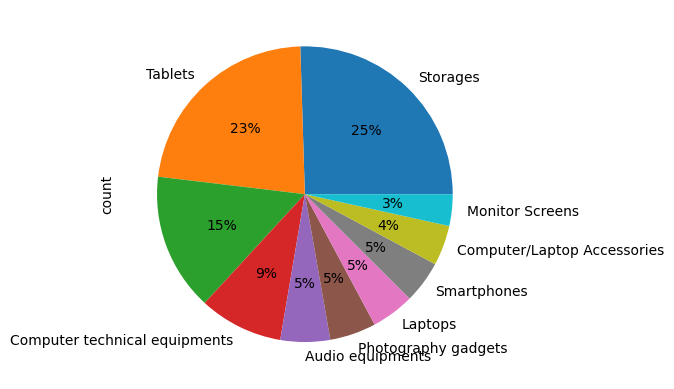

In [ ]:
cat_count = merged_cat['category'].value_counts()
cat_count.plot.pie(y='count', autopct='%1.0f%%')

In [ ]:
merged_cat['unit_price'].max()

999.99

In [ ]:
merged_cat['unit_price_range'].value_counts()

,count
unit_price_range,
under 50,24572
under 100,13030
under 200,11287
under 500,9142
under 1k,3271


In [ ]:
merged_cat['price_range'].value_counts()

,count
price_range,
under 50,19668
under 100,14298
under 200,10660
under 500,8704
under 1k,4117
under 2k,2155
over 2k,1700


**Price distribution**

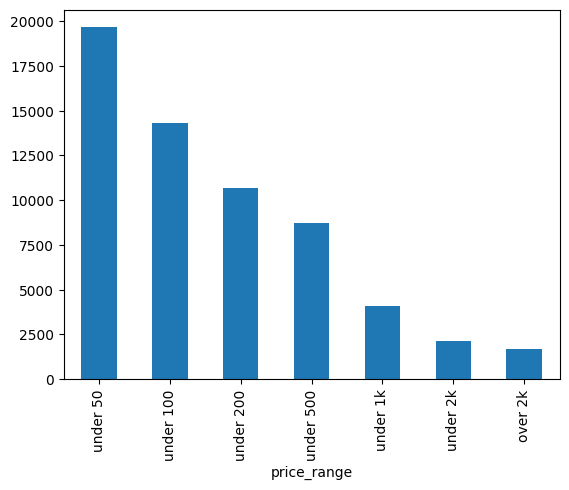

In [ ]:
merged_cat['price_range'].value_counts().plot.bar();

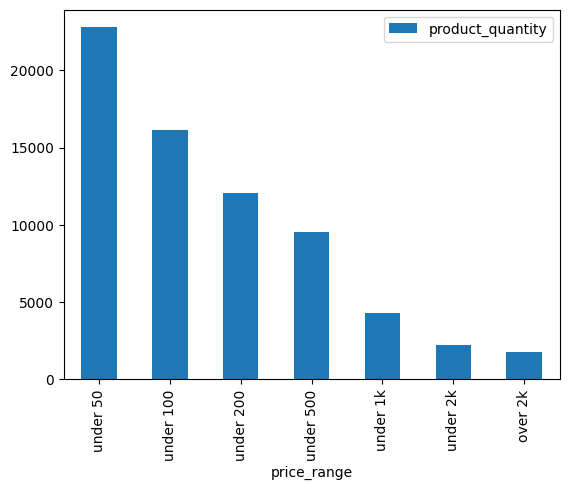

In [ ]:
(merged_cat.groupby('price_range')
           .agg({'product_quantity': 'sum'})
           .sort_values('product_quantity', ascending=False)
           .plot.bar());

In [ ]:
#Checking Apple iMac
(merged_cat.loc[(merged_cat['name'].str.contains('imac', case=False))
                 & (merged_cat['brand_code'] == 'APP')
                 & ~(merged_cat['name'].str.contains('care', case=False))])

,id,id_order,product_quantity,sku,unit_price,date,name,desc,price,in_stock,type,diff_price,%_discount,type_category,words_category,brand_code,long,price_range,unit_price_range,category
88,1119836,299901,1,APP1198,198.7,2017-01-01 19:32:29,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 8GB ...",IMac desktop computer 27 inch 5K Retina 8GB RA...,2129.00,0,1282,1930.30,90.666980,,"Laptops, apple_computer",APP,Apple,over 2k,under 200,Laptops
182,1120543,300253,1,APP1267,195.0,2017-01-02 07:56:57,"Apple iMac 21.5 ""Core i7 33GHz 4K Retina Displ...",Apple iMac desktop Core i7 21.5-inch Retina di...,2089.00,0,1282,1894.00,90.665390,,"Laptops, apple_computer",APP,Apple,over 2k,under 200,Laptops
658,1123377,301500,1,APP1267,195.0,2017-01-03 12:11:10,"Apple iMac 21.5 ""Core i7 33GHz 4K Retina Displ...",Apple iMac desktop Core i7 21.5-inch Retina di...,2089.00,0,1282,1894.00,90.665390,,"Laptops, apple_computer",APP,Apple,over 2k,under 200,Laptops
914,1129624,302360,1,APP1242,176.4,2017-01-04 11:29:09,"Apple iMac 21.5 ""Core i5 2.8GHz | 16GB | 1TB F...",PC 215 inch iMac 2.8GHz RAM 16GB 1TB Fusion (M...,1889.00,0,1282,1712.60,90.661726,,"Laptops, apple_computer",APP,Apple,under 2k,under 200,Laptops
1164,1131635,303319,1,APP1242,176.4,2017-01-05 18:32:20,"Apple iMac 21.5 ""Core i5 2.8GHz | 16GB | 1TB F...",PC 215 inch iMac 2.8GHz RAM 16GB 1TB Fusion (M...,1889.00,0,1282,1712.60,90.661726,,"Laptops, apple_computer",APP,Apple,under 2k,under 200,Laptops
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60115,1637042,521796,1,APP2245,272.5,2018-03-05 17:45:11,"Apple iMac 27 ""Core i7 Retina 5K 42Ghz | 8GB |...",IMac desktop computer 27 inch 5K Retina 8GB RA...,2839.00,0,"5,74E+15",2566.50,90.401550,,"Laptops, apple_computer",APP,Apple,over 2k,under 500,Laptops
60681,1641210,523720,1,APP2088,159.9,2018-03-09 11:27:42,"Apple iMac 215 ""Core i5 3.4Ghz 4K Retina | 8GB...",IMac desktop computer 215 inch 8GB RAM 1TB Fusion,1705.59,1,"2,16E+11",1545.69,90.624945,,"Laptops, apple_computer",APP,Apple,under 2k,under 200,Laptops
60823,1644202,524733,1,APP2208,191.9,2018-03-10 10:28:41,"Apple iMac 21.5 ""Core i5 3.4GHz 4K Retina | 8G...",PC 215 inch iMac with 8GB RAM 512GB SSD PCle,2059.00,0,"2,16E+11",1867.10,90.679942,,"Laptops, apple_computer",APP,Apple,over 2k,under 200,Laptops
60915,1646084,525427,1,APP2203,241.2,2018-03-11 13:26:50,"Apple iMac 21.5 ""Core i7 4K Retina 36Ghz | 16G...",IMac desktop computer 215 with 512GB RAM 16GB ...,2539.00,0,"2,16E+11",2297.80,90.500197,,"Laptops, apple_computer",APP,Apple,over 2k,under 500,Laptops


**under 50 product price**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def rel_graph(df, price_range, range, percent_discount, product_quantity):
  """

  Args:
    df:
    price_range:
    range:
    percent_discount:
    product_quantity:
  """
  print(f'The relationship timeline of % discount and quantity in {range} price range')

  df_range = df.loc[(df[price_range] == range) & (df[percent_discount] >= 0)]
  df_range.loc[:, percent_discount] = df_range[percent_discount].round(2)
  df_range_discount = df_range.groupby(percent_discount).agg({product_quantity: 'sum'}).reset_index()

  df_range_timeline = (df.loc[(df[price_range] == range) & (df[percent_discount] >= 0)]
                        .resample('D', on='date')
                        .agg({percent_discount: 'mean',
                              product_quantity: 'sum'}))

  # Creating figure with subplots. The figure is like a frame I can place multiple plots in
  fig, ax1 = plt.subplots(figsize=(10, 5))

  # Plotting discount lineplot
  sns.lineplot(data = df_range_timeline,
              x = 'date',
              y = percent_discount,
              color = 'orange',
              ax = ax1)
  # Setting the range for the discounts' y axis to go from 0 to 100
  ax1.set_ylim(0,100)

  # Creating additional y axis for second plot (this is the key to getting them to share a plot)
  ax2 = ax1.twinx()
  # Plotting sales lineplot
  sns.lineplot(data = df_range_timeline,
              x = 'date',
              y = product_quantity,
              color = 'steelblue',
              ax = ax2)

  sns.relplot(kind = 'line',
            data = df_range_timeline,
            x = 'date',
            y = percent_discount,
            height = 2.5,
            aspect = 3)

  sns.relplot(kind = 'line',
            data = df_range_timeline,
            x = 'date',
            y = product_quantity,
            height = 2.5,
            aspect = 3)

  sns.relplot(kind = 'scatter',
           data = df_range_discount,
           x = percent_discount,
           y = product_quantity);

**under 50 price range**

The relationship timeline of % discount and quantity in under 50 price range


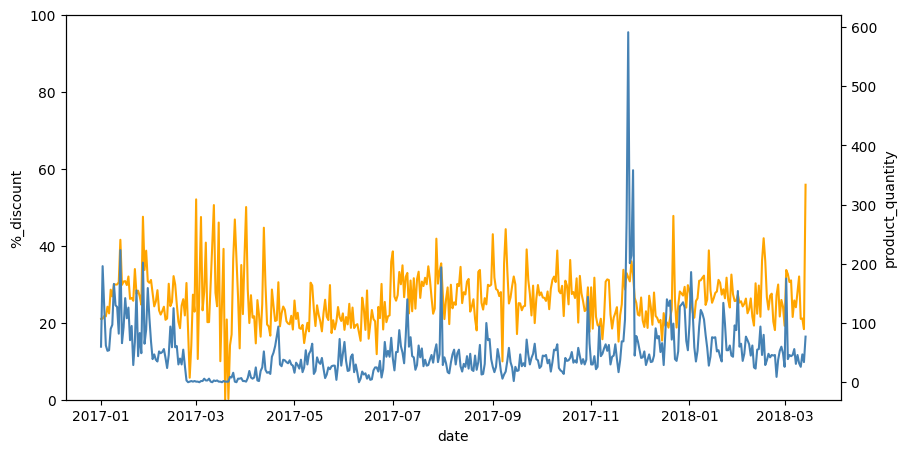

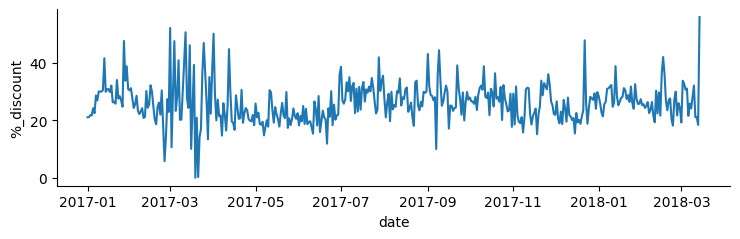

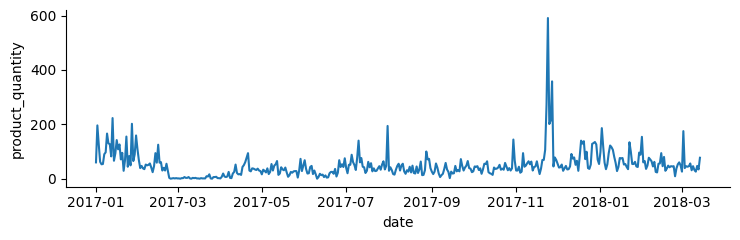

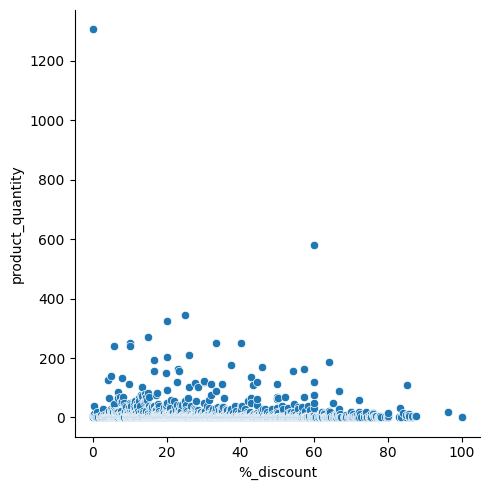

In [ ]:
rel_graph(merged_cat,'price_range', 'under 50', '%_discount', 'product_quantity')

**under 100 product price**

The relationship timeline of % discount and quantity in under 100 price range


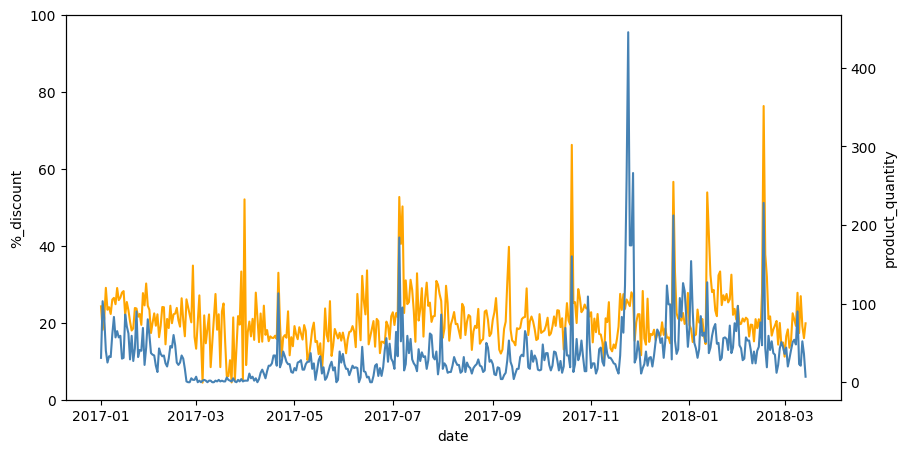

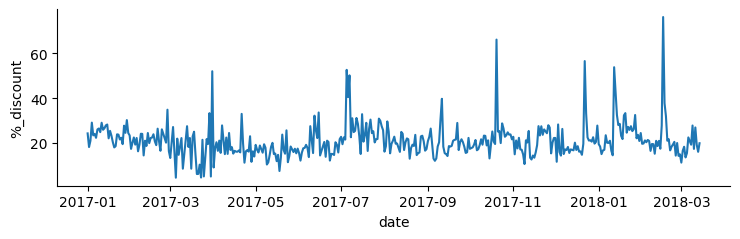

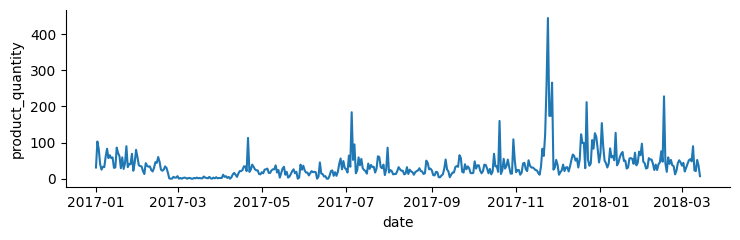

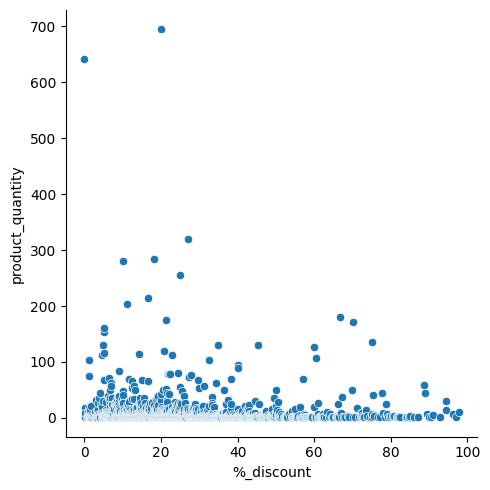

In [ ]:
rel_graph(merged_cat,'price_range', 'under 100', '%_discount', 'product_quantity')

**under 200 product price**

The relationship timeline of % discount and quantity in under 200 price range


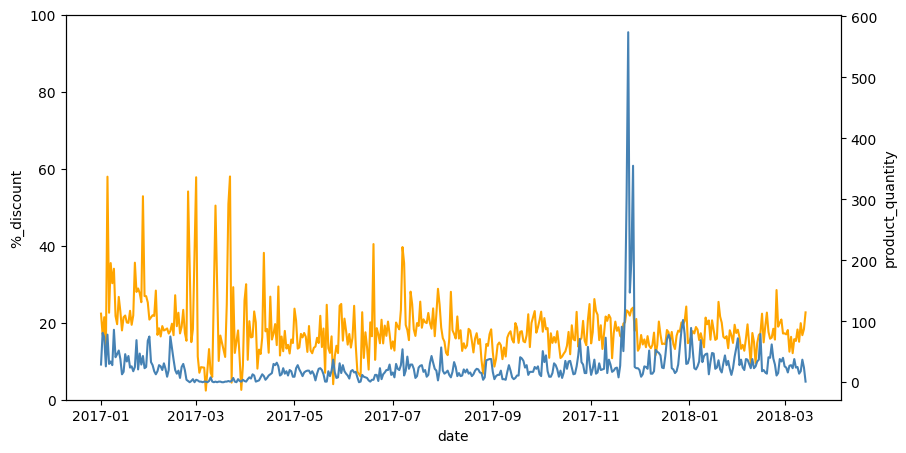

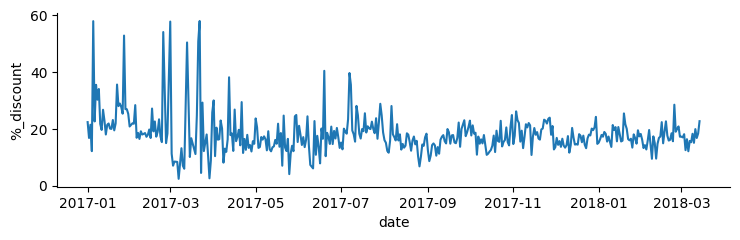

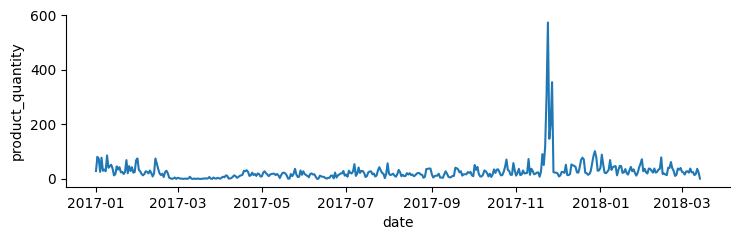

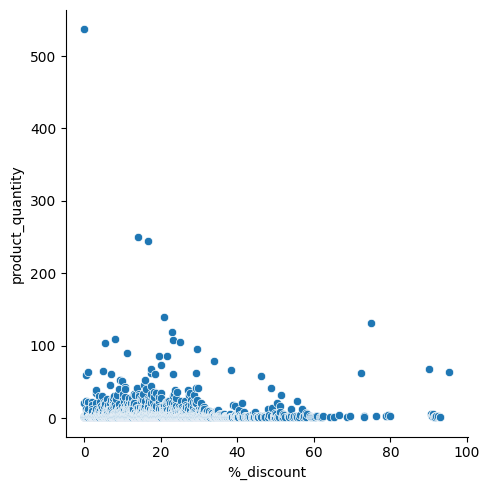

In [ ]:
rel_graph(merged_cat,'price_range', 'under 200', '%_discount', 'product_quantity')

**under 500 price range**

The relationship timeline of % discount and quantity in under 500 price range


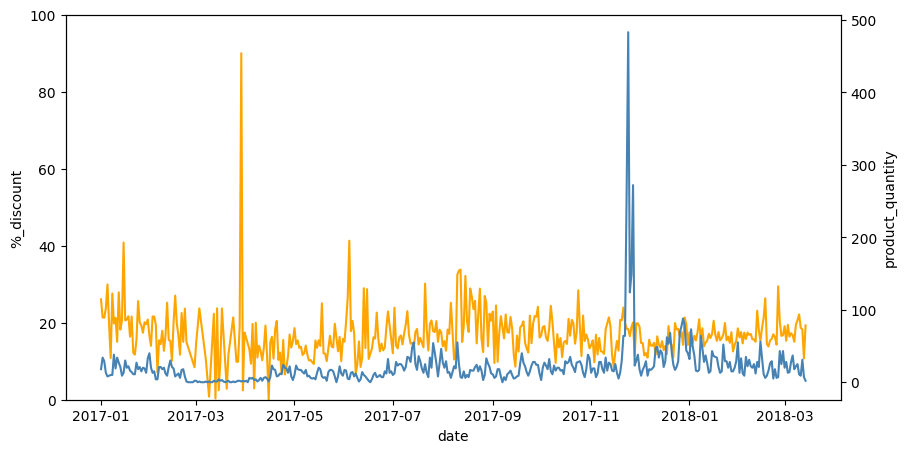

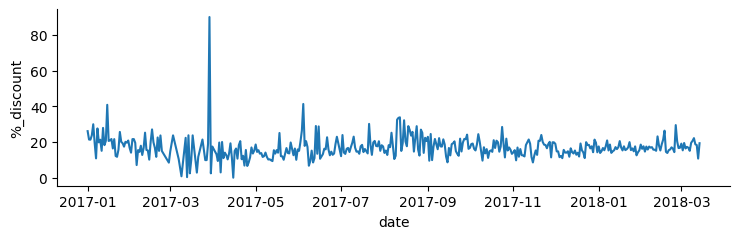

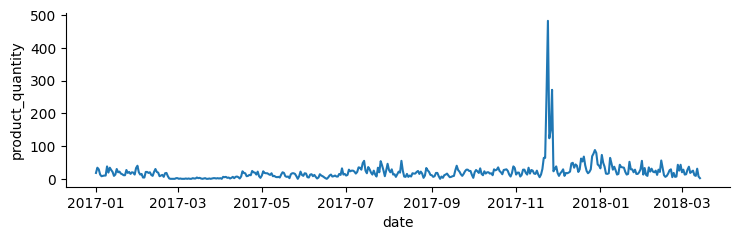

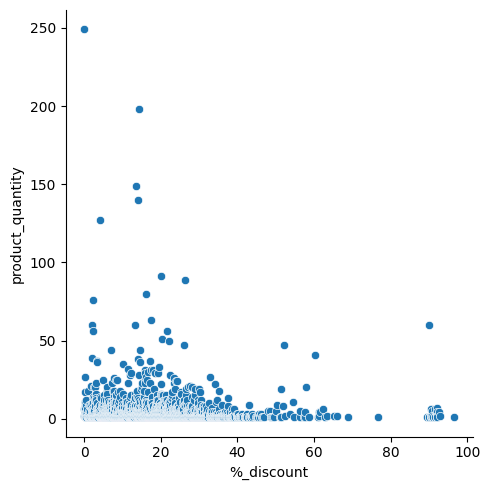

In [ ]:
rel_graph(merged_cat,'price_range', 'under 500', '%_discount', 'product_quantity')

**under 1k price range**

The relationship timeline of % discount and quantity in under 1k price range


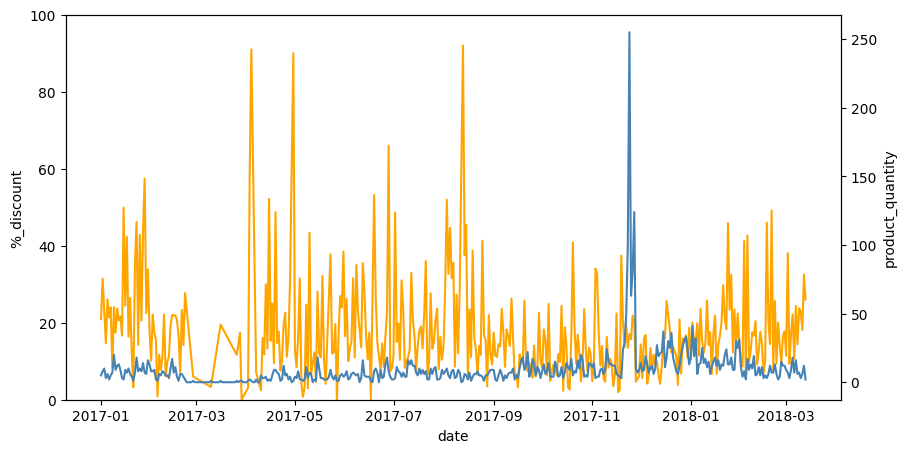

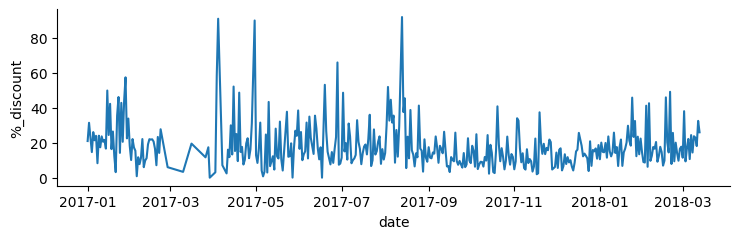

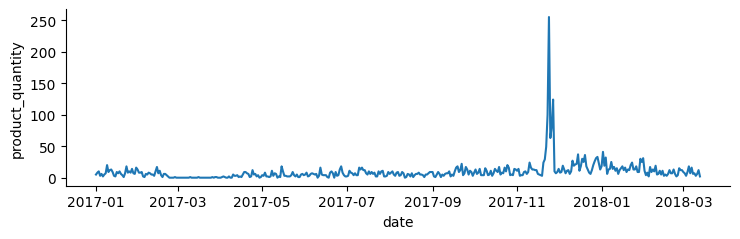

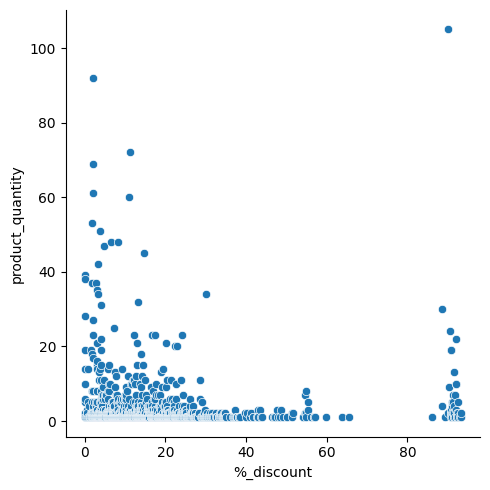

In [ ]:
rel_graph(merged_cat,'price_range', 'under 1k', '%_discount', 'product_quantity')

**under 2k price range**

The relationship timeline of % discount and quantity in under 2k price range


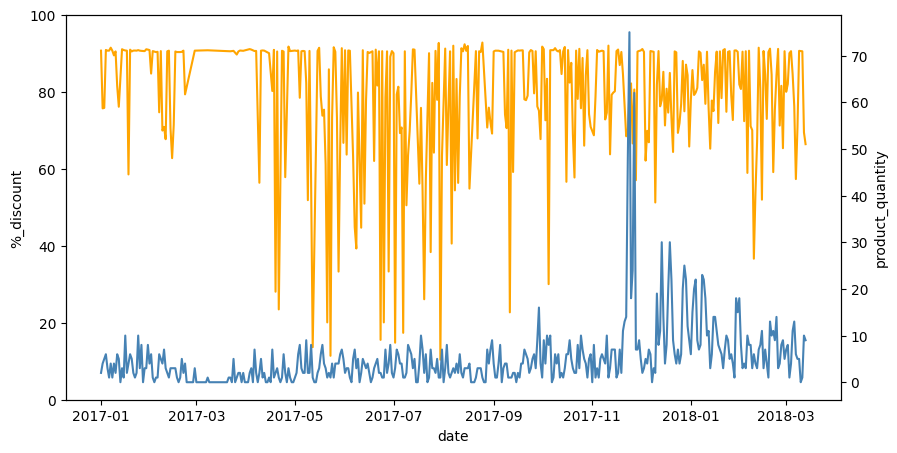

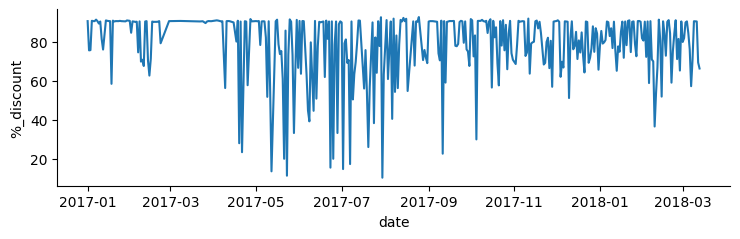

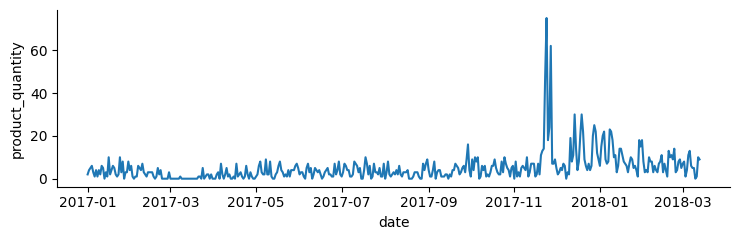

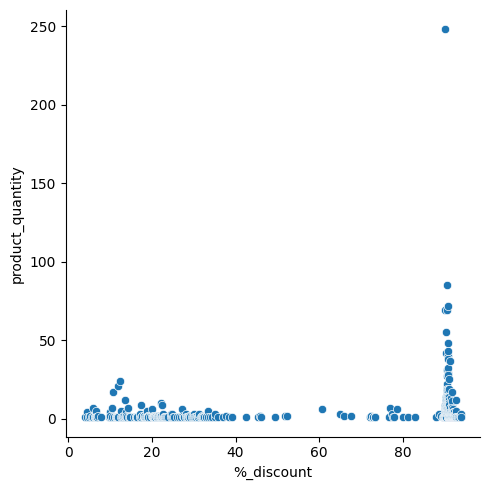

In [ ]:
rel_graph(merged_cat,'price_range', 'under 2k', '%_discount', 'product_quantity')

**over 2k price range**

The relationship timeline of % discount and quantity in over 2k price range


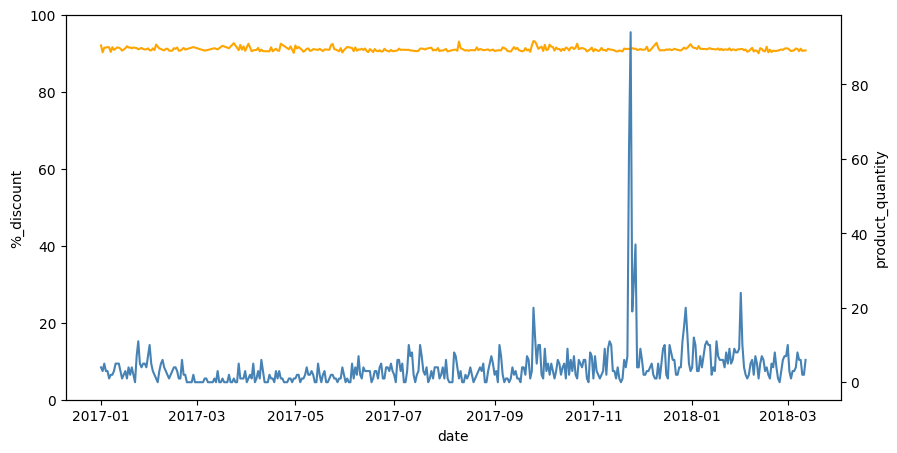

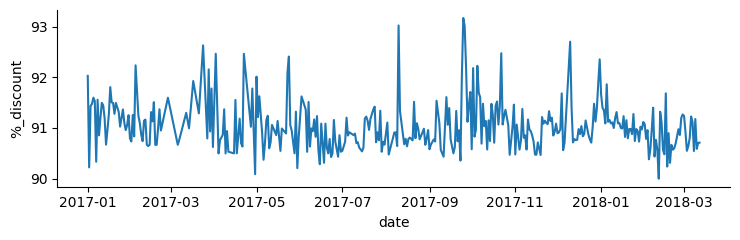

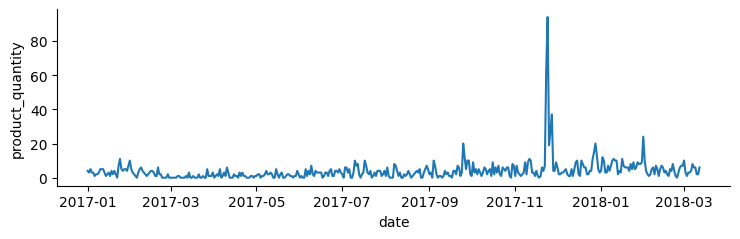

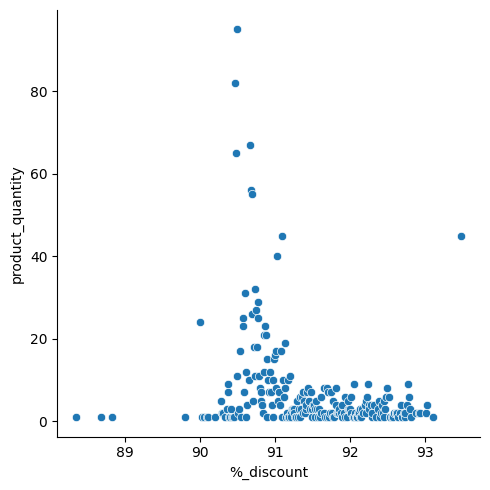

In [ ]:
rel_graph(merged_cat,'price_range', 'over 2k', '%_discount', 'product_quantity')

#Category relationship

In [ ]:
def rel_category(df, category_col, category, percent_discount, product_quantity):
  """

  Args:
    df:
    price_range:
    range:
    percent_discount:
    product_quantity:
  """
  print(f'The relationship of % discount and quantity in {category} category')

  df_range = df.loc[(df[category_col] == category) & (df[percent_discount] >= 0)]
  df_range.loc[:, percent_discount] = df_range[percent_discount].round(2)
  df_range_discount = df_range.groupby(percent_discount).agg({product_quantity: 'sum'}).reset_index()

  df_range_timeline = (df.loc[(df[category_col] == category) & (df[percent_discount] >= 0)]
                        .resample('D', on='date')
                        .agg({percent_discount: 'mean',
                              product_quantity: 'sum'}))

  # Creating figure with subplots. The figure is like a frame I can place multiple plots in
  fig, ax1 = plt.subplots(figsize=(10, 5))

  # Plotting discount lineplot
  sns.lineplot(data = df_range_timeline,
              x = 'date',
              y = percent_discount,
              color = 'orange',
              ax = ax1)
  # Setting the range for the discounts' y axis to go from 0 to 100
  ax1.set_ylim(0,100)

  # Creating additional y axis for second plot (this is the key to getting them to share a plot)
  ax2 = ax1.twinx()
  # Plotting sales lineplot
  sns.lineplot(data = df_range_timeline,
              x = 'date',
              y = product_quantity,
              color = 'steelblue',
              ax = ax2)

  sns.relplot(kind = 'line',
            data = df_range_timeline,
            x = 'date',
            y = percent_discount,
            height = 2.5,
            aspect = 3)

  sns.relplot(kind = 'line',
            data = df_range_timeline,
            x = 'date',
            y = product_quantity,
            height = 2.5,
            aspect = 3)

  sns.relplot(kind = 'scatter',
           data = df_range_discount,
           x = percent_discount,
           y = product_quantity);

In [ ]:
cat_list = list(merged_cat['category'].unique()).copy()

In [ ]:
cat_list

['Computer technical equipments',
 '',
 'Tablets',
 'Laptops',
 'Storages',
 'Photography gadgets',
 'Audio equipments',
 'Monitor Screens',
 'Computer/Laptop Accessories',
 'Smartphones']

In [ ]:
cat_list.remove('')

In [ ]:
cat_list

['Computer technical equipments',
 'Tablets',
 'Laptops',
 'Storages',
 'Photography gadgets',
 'Audio equipments',
 'Monitor Screens',
 'Computer/Laptop Accessories',
 'Smartphones']

The relationship of % discount and quantity in Computer technical equipments category

 

The relationship of % discount and quantity in Tablets category

 

The relationship of % discount and quantity in Laptops category

 

The relationship of % discount and quantity in Storages category

 

The relationship of % discount and quantity in Photography gadgets category

 

The relationship of % discount and quantity in Audio equipments category


<ipython-input-50-77e054a2f8e5>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax1 = plt.subplots(figsize=(10, 5))



 

The relationship of % discount and quantity in Monitor Screens category

 

The relationship of % discount and quantity in Computer/Laptop Accessories category

 

The relationship of % discount and quantity in Smartphones category

 



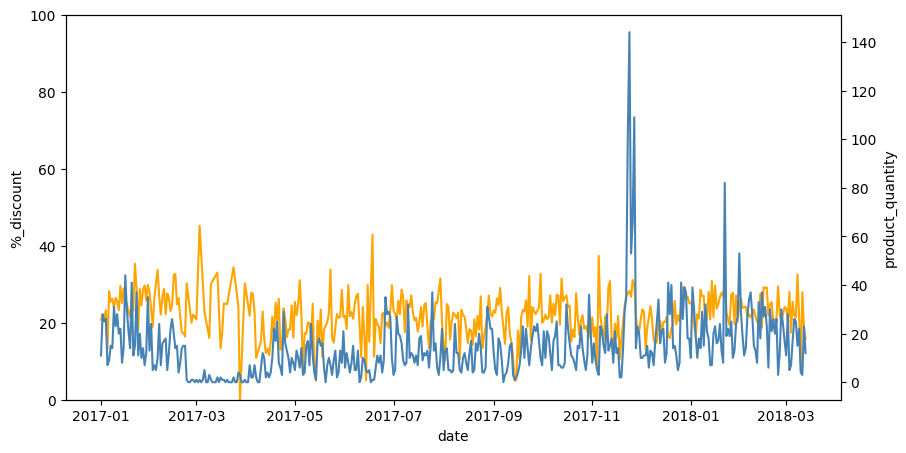

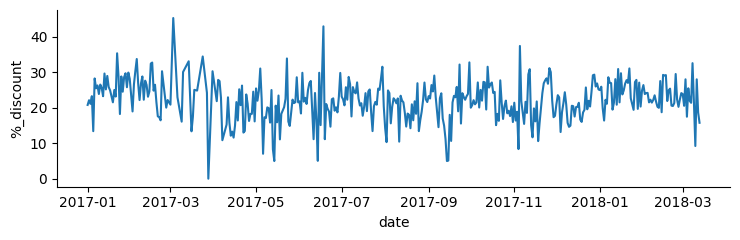

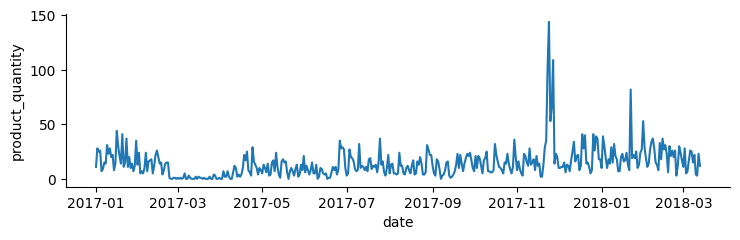

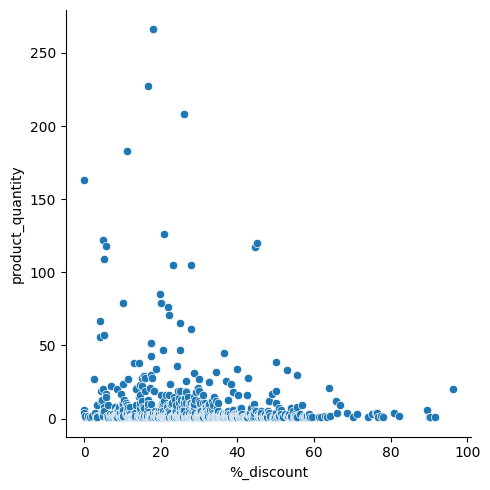

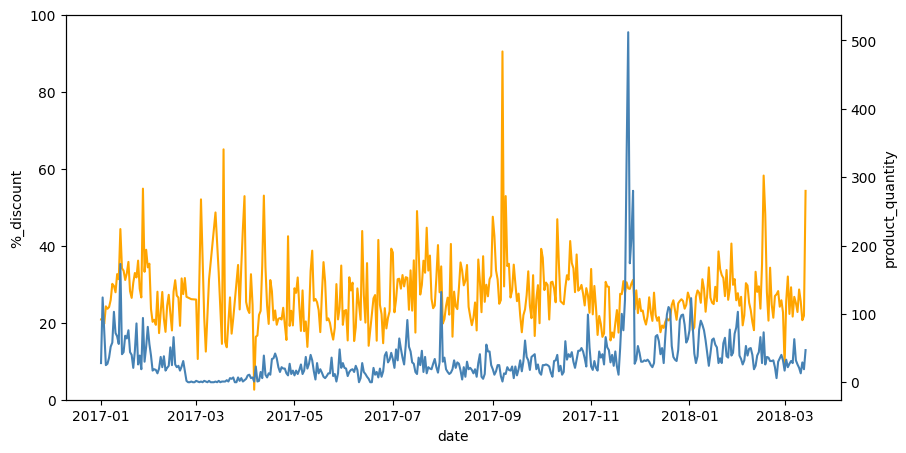

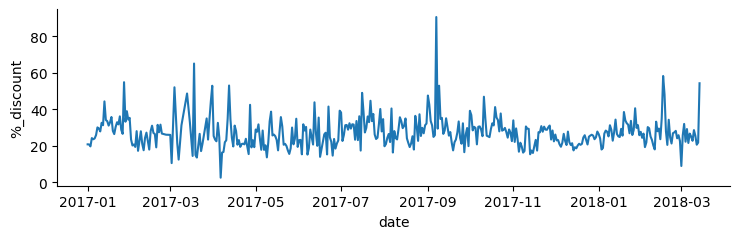

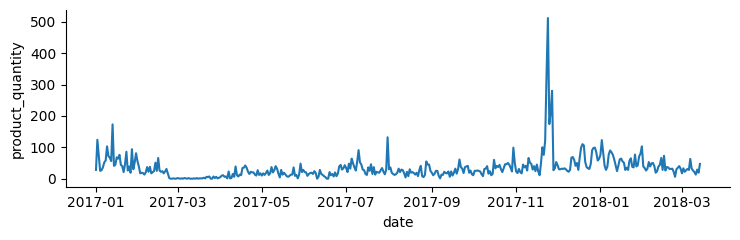

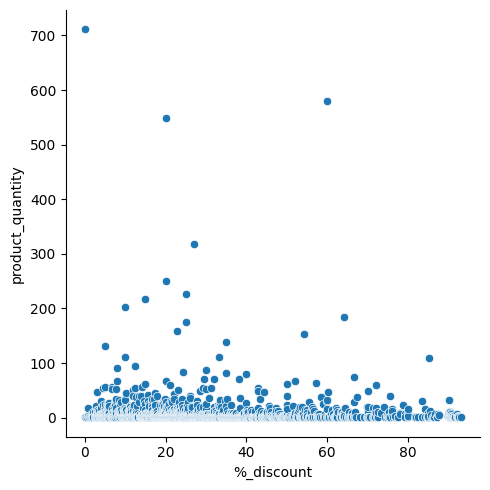

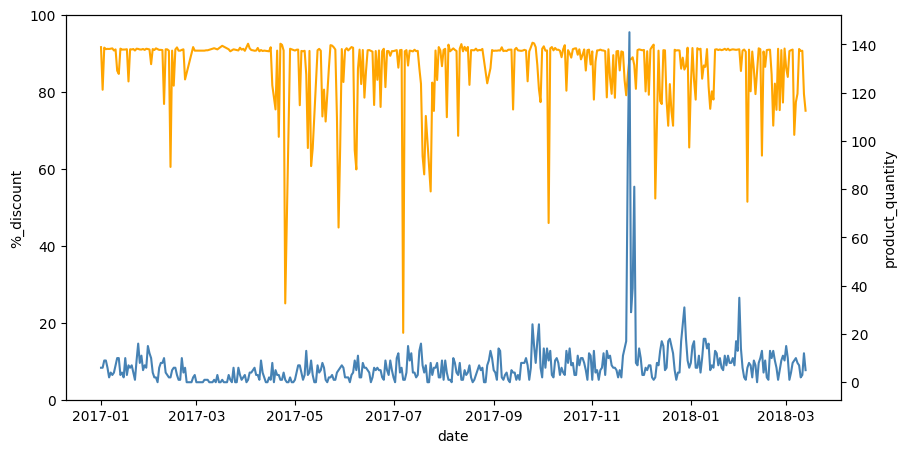

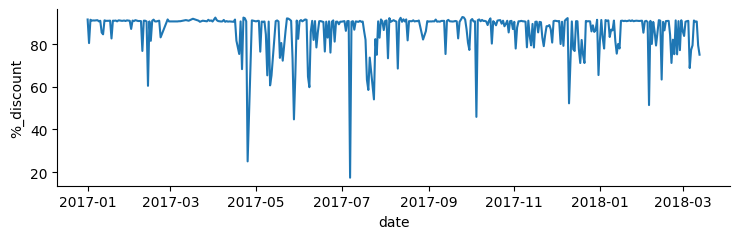

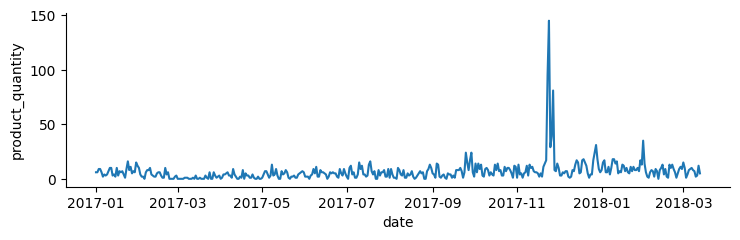

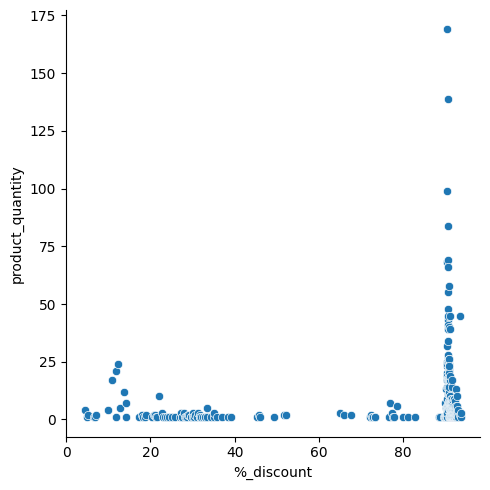

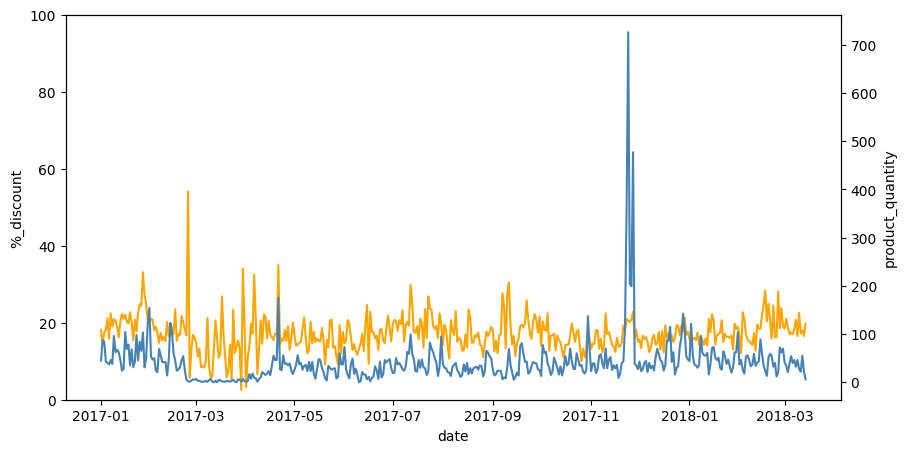

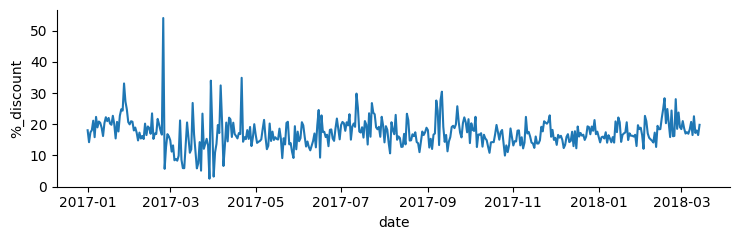

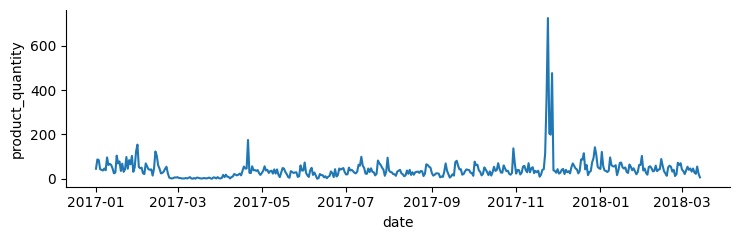

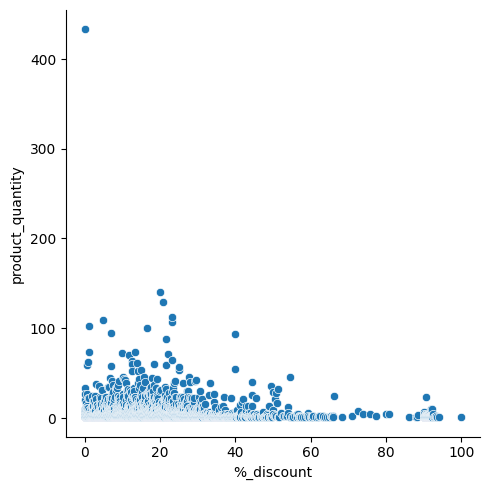

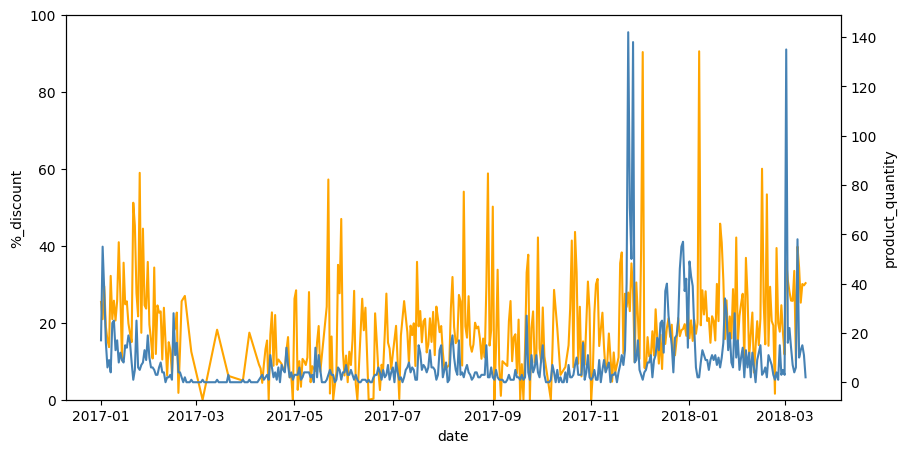

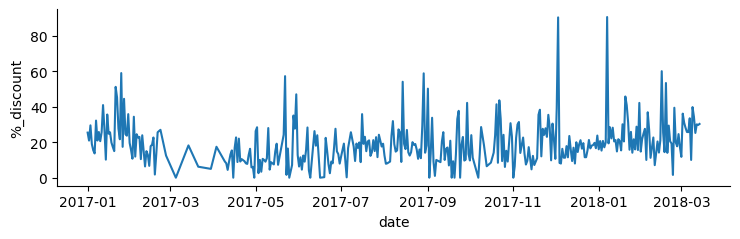

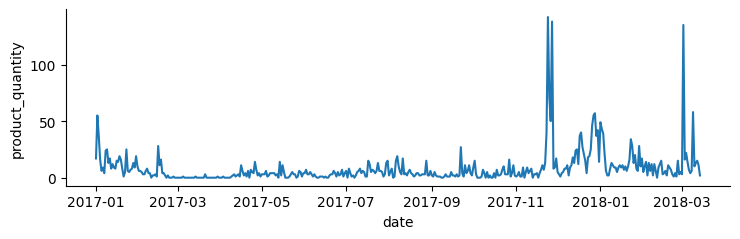

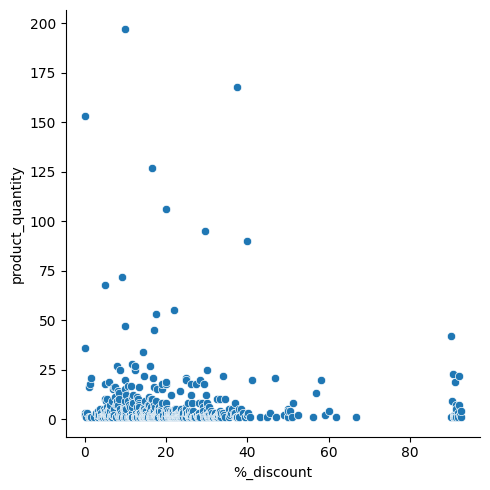

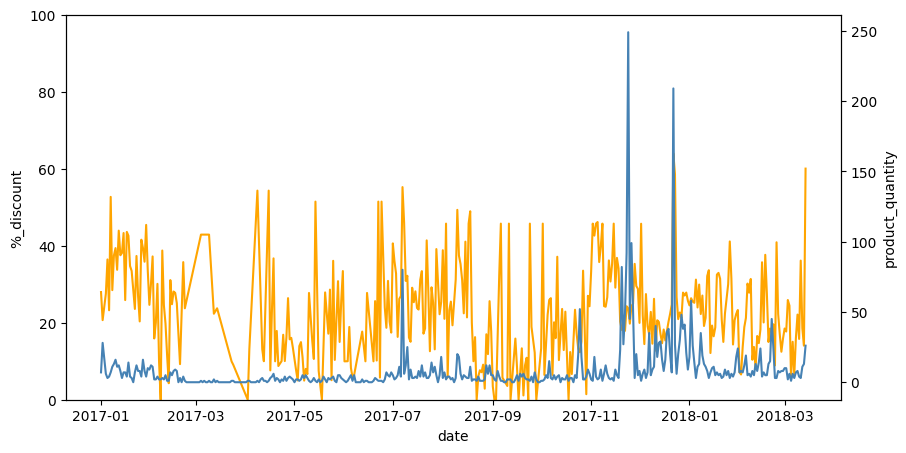

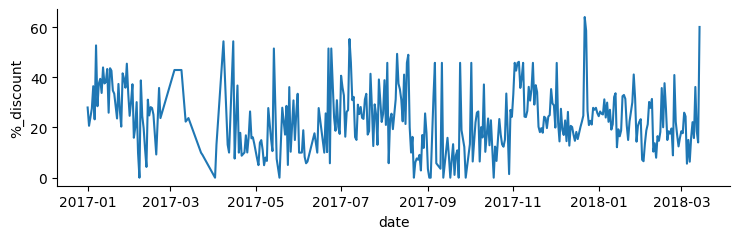

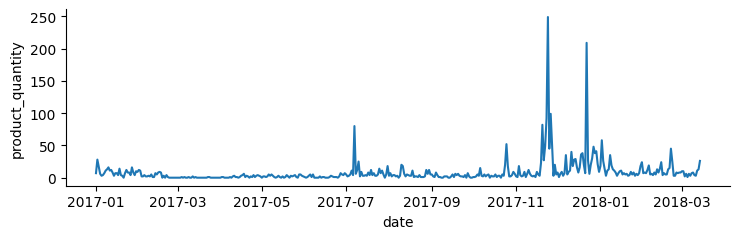

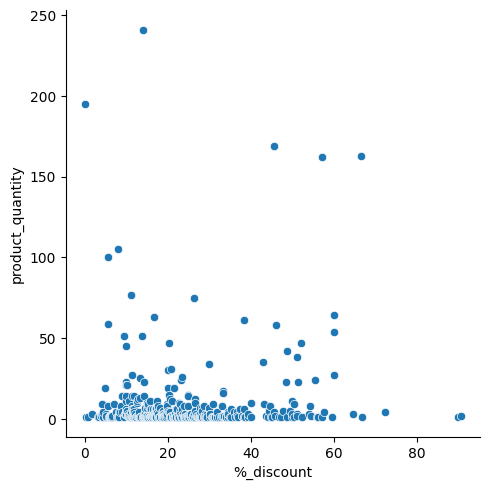

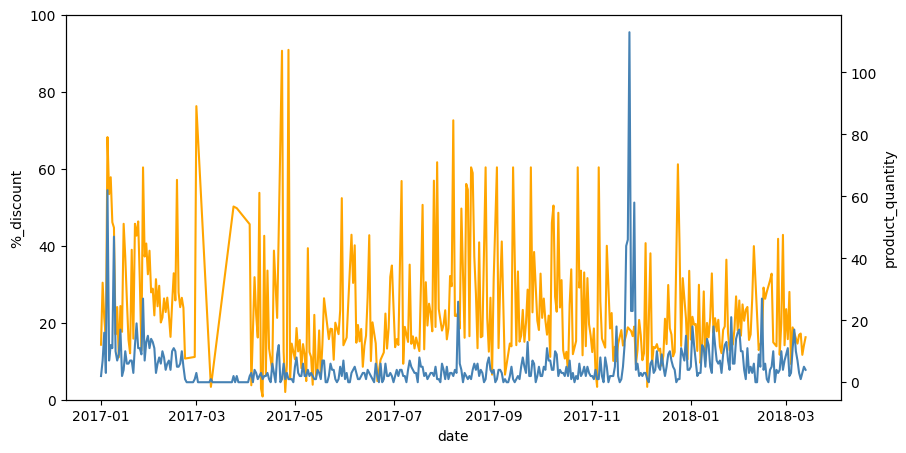

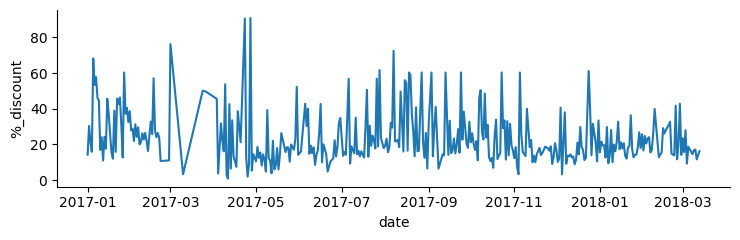

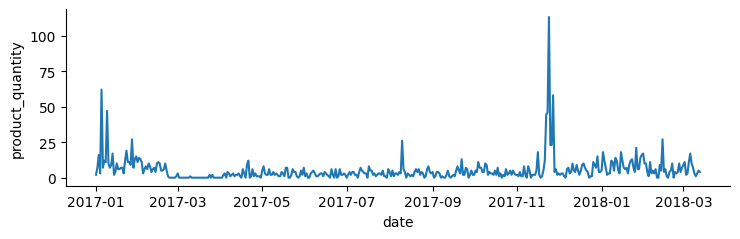

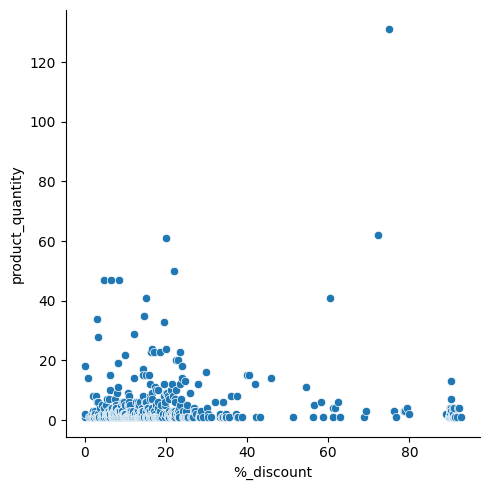

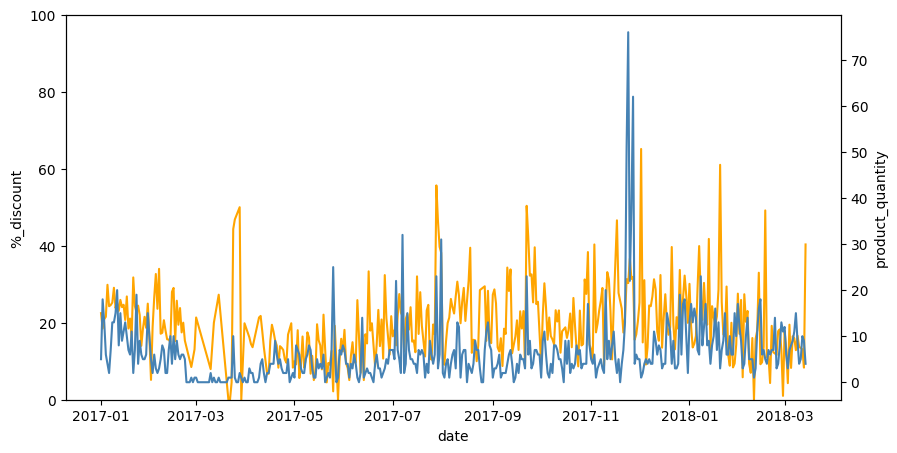

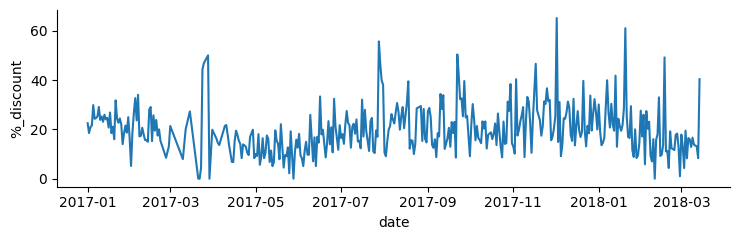

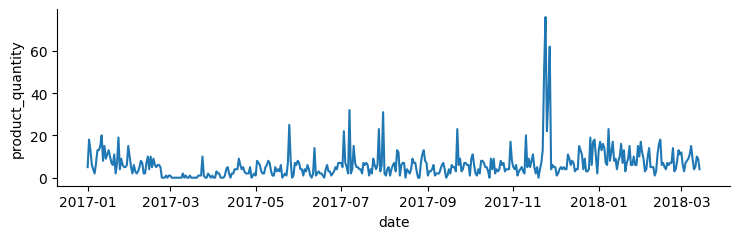

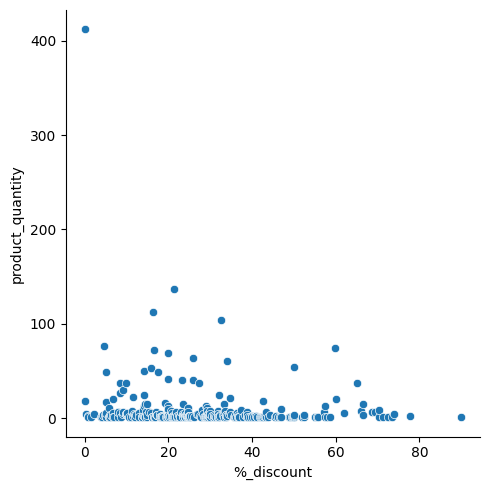

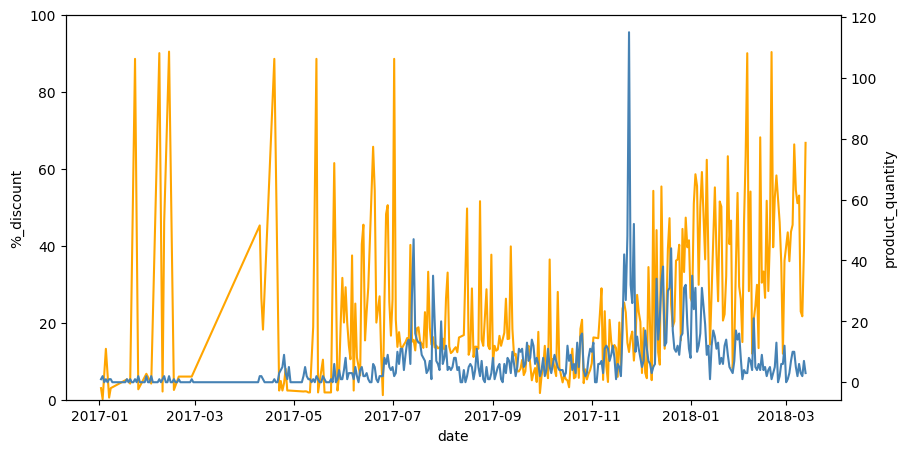

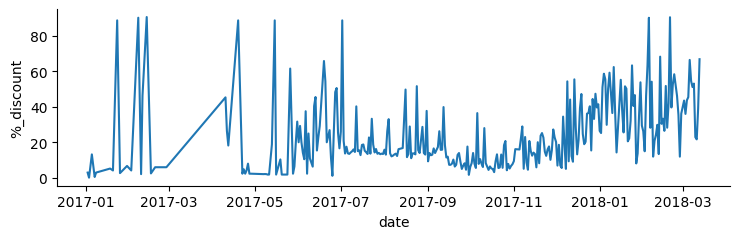

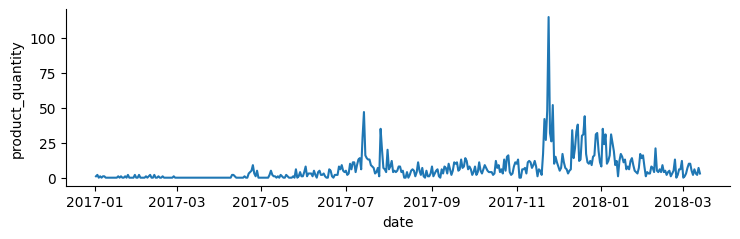

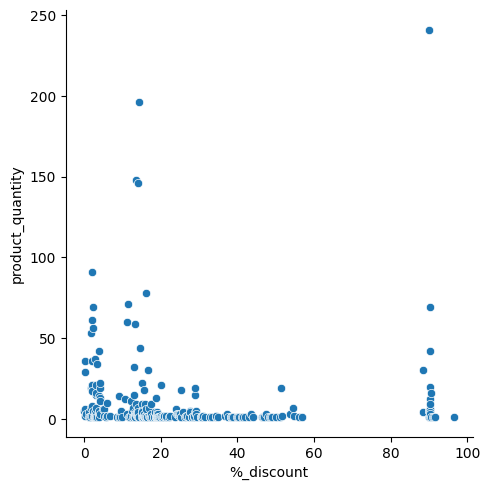

In [ ]:
for i in cat_list:
  rel_category(merged_cat, 'category', i, '%_discount', 'product_quantity')
  print('\n ============================================================= \n \n')

In [ ]:
import random
presenter = ['Choncha', 'Dana']
print(random.choices(presenter, k=1))

['Dana']


In [ ]:
plt.figure(figsize=(8, 6))

plt.bar(expensive_products_discount_ranges_reset_positive['discount_range'], expensive_products_discount_ranges_reset_positive['total_price'], color='indianred')

plt.xlabel('Discount Range [%]', fontsize=16, labelpad=15)

plt.ylabel('Product Quantity', fontsize=16, labelpad=15)

x_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

#x_labels = ['', '10-20', '', '30-40', '', '50-60', '', '70-80', '', '90-100']

plt.yticks(fontsize=14)

plt.xticks(ticks=range(1, 11), labels=x_labels, fontsize=14)

plt.savefig('expensive_products_total_price_vs_discount_range.png', dpi=300, bbox_inches='tight')